# by using Z-Score methode 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

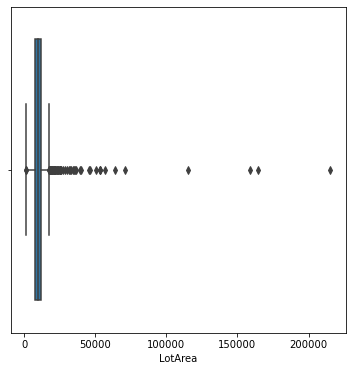

In [6]:
pyplot.figure(figsize=(6,6),facecolor='white')
sns.boxplot(data["LotArea"])

In [7]:
out = []
def z_score(df):
    data_mean = np.mean(df)
    data_std = np.std(df)
    for i in df:
        z = (i-data_mean)/data_std
        if np.abs(z)>3:
            out.append(i)
    return(out)

In [8]:
z_score(data["LotArea"])

[50271,
 159000,
 215245,
 164660,
 53107,
 70761,
 53227,
 46589,
 115149,
 53504,
 45600,
 63887,
 57200]

# IQR Method 

In [9]:
outlier = []
def iqr_quartile (df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    for i in df:
        if i> upper_tail or i<lower_tail:
            outlier.append(i)
    return(outlier)
        

In [10]:
iqr_quartile(data["LotArea"])

[50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 18890,
 24682,
 23595,
 17871,
 36500,
 63887,
 20781,
 25339,
 57200,
 20544,
 19690,
 21930,
 26142]

In [11]:
len(outlier)

69

# WINSORIZATION METHOD(PERCENTILE CAPPING) 

In [12]:
outliers=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            outliers.append(i)
    return(outliers)

In [13]:
Winsorization_outliers(data["LotArea"])

[50271,
 1596,
 159000,
 39104,
 215245,
 164660,
 53107,
 70761,
 53227,
 1526,
 40094,
 1491,
 46589,
 115149,
 53504,
 45600,
 1300,
 1533,
 1477,
 63887,
 57200,
 1533]

# using DB SCAN Method

In [14]:
from sklearn.cluster import DBSCAN

def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))


In [15]:
DB_outliers(data["LotArea"]) 

-1     1179
 4       25
 1       24
 14      17
 23      15
 21      14
 13      14
 19      10
 16      10
 24      10
 20       9
 17       9
 3        8
 7        8
 8        7
 22       6
 25       6
 2        6
 12       6
 0        6
 31       6
 32       5
 26       5
 27       5
 29       5
 15       5
 18       5
 11       5
 10       5
 9        5
 6        5
 5        5
 28       5
 30       5
Name: cluster, dtype: int64


# VISUALIZING THE DATA

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


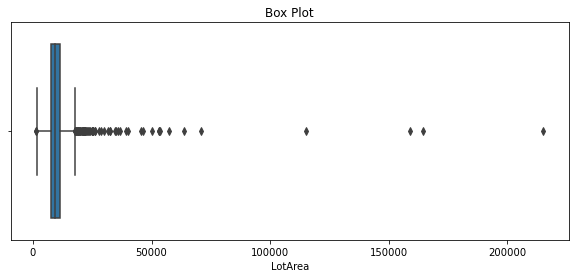

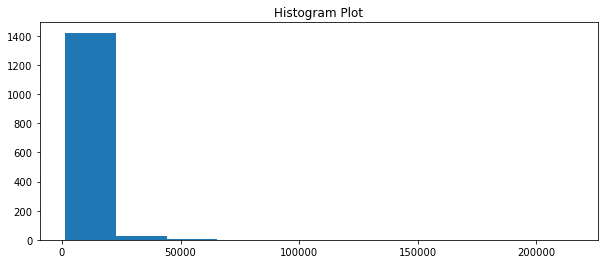

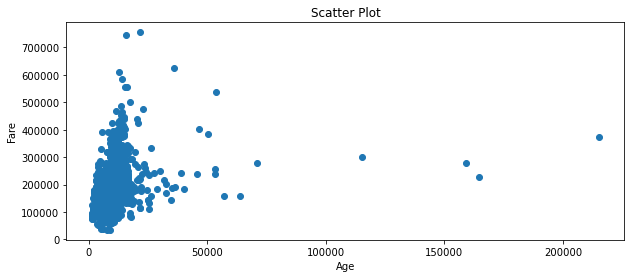

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


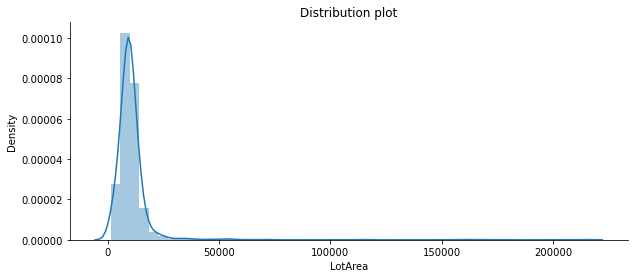

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 720x288 with 0 Axes>

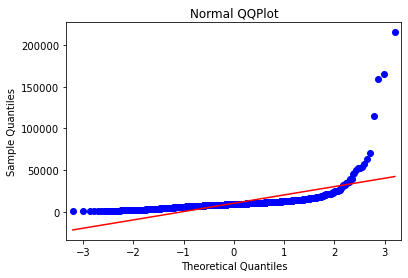

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
dataset = pd.read_csv('train.csv')
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(dataset['LotArea'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(dataset['LotArea'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(dataset['LotArea'],dataset['SalePrice'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(dataset['LotArea'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(dataset['LotArea'])

# DELETING OBSERVATIONS

In [17]:
dataset = pd.read_csv('train.csv')

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


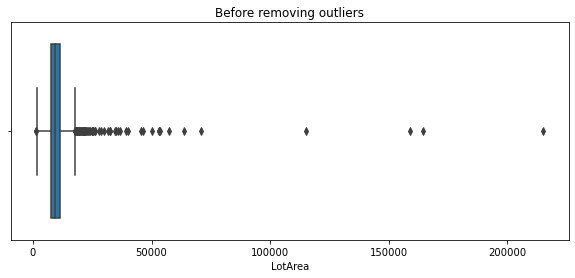

7553.5
11601.5
4048.0
1481.5
17673.5
6072.0


C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


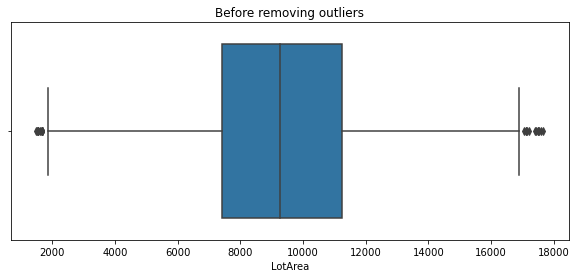

In [18]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.title("Before removing outliers")
    plt.show()
Box_plots(dataset['LotArea'])


def drop_outlier (df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    print(q1)
    print(q3)
    print(iqr)
    print(lower_tail)
    print(upper_tail)
    iqr1 = 1.5 * (np.percentile(df[col_name], 75) - np.percentile(df[col_name], 25))
    print(iqr1)
    df.drop(df[df[col_name] > (iqr1 + np.percentile(df[col_name], 75))].index, inplace=True)
    df.drop(df[df[col_name] < (np.percentile(df[col_name], 25) - iqr1)].index, inplace=True)    
drop_outlier(dataset, 'LotArea')


def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.title("Before removing outliers")
    plt.show()
Box_plots(dataset['LotArea'])

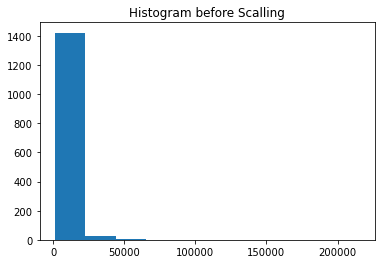

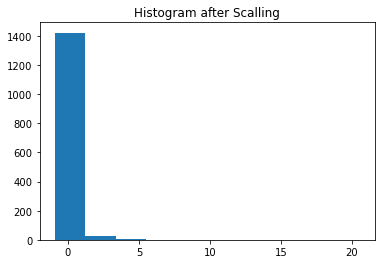

In [19]:
from sklearn import preprocessing
data_set = pd.read_csv('train.csv')
plt.hist(data_set['LotArea'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
data_set['LotArea'] = scaler.fit_transform(data_set['LotArea'].values.reshape(-1,1))
plt.hist(data_set['LotArea'])
plt.title("Histogram after Scalling")
plt.show()

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


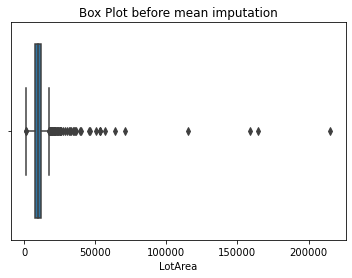

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


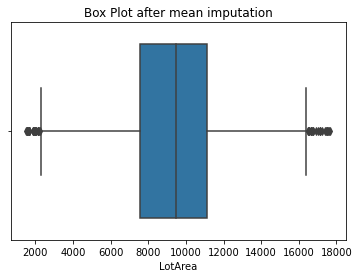

In [20]:
#mean imputation
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
sns.boxplot(train['LotArea'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = train['LotArea'].quantile(0.25)
q3 = train['LotArea'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train['LotArea'])
for i in train['LotArea']:
    if i > Upper_tail or i < Lower_tail:
            train['LotArea'] = train['LotArea'].replace(i, m)
sns.boxplot(train['LotArea'])
plt.title("Box Plot after mean imputation")
plt.show() 

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


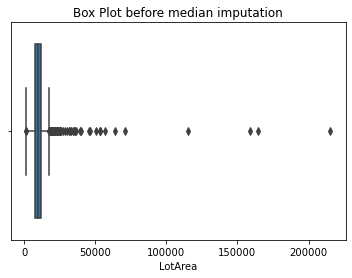

C:\Users\tarun.k.agarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


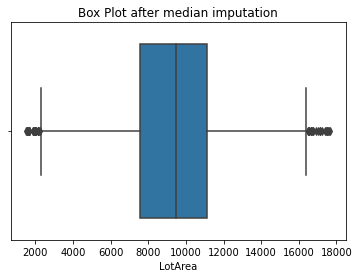

In [21]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
sns.boxplot(train['LotArea'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['LotArea'].quantile(0.25)
q3 = train['LotArea'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['LotArea'])
for i in train['LotArea']:
    if i > Upper_tail or i < Lower_tail:
            train['LotArea'] = train['LotArea'].replace(i, med)
sns.boxplot(train['LotArea'])
plt.title("Box Plot after median imputation")
plt.show()        